# Load libraries 

In [1]:
#load libraries 
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

import root_pandas
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from scipy.optimize import curve_fit


Welcome to JupyROOT 6.23/01


# Load tuple files
The following will automatically download the files from https://userweb.jlab.org/~spaul/sidis_tuple_examples, if they are not already downloaded.  

In [2]:
import urllib.request, os

for filename in "data_dihadrons.root","data_dipions.root":
    if not (filename in os.listdir(".")):
        url = 'https://userweb.jlab.org/~spaul/sidis_tuples_examples/' +filename
        urllib.request.urlretrieve(url, filename)
        print("downloaded file from " + url)
    else:
        print("found file: " + filename + ",\t no need to re-download")
print("done downloading or finding files")

found file: data_dihadrons.root,	 no need to re-download
found file: data_dipions.root,	 no need to re-download
done downloading or finding files


Now load the tuples from the files.

In [3]:

data_dihadrons = root_pandas.read_root("data_dihadrons.root", "dihadrons")
data_dipions = root_pandas.read_root("data_dipions.root", "dipions")

for df in data_dihadrons, data_dipions:
    df['diff_phi_shift'] = df.diff_phi_cm + (2*np.pi)*(df.diff_phi_cm<-np.pi/2)

In [4]:
#print the number of entries in each tuple
print("data dihadrons \tlength =", len(data_dihadrons))
print("data dipions \tlength =", len(data_dipions))

data dihadrons 	length = 469183
data dipions 	length = 945047


In [5]:
print(data_dihadrons.columns)
print(data_dipions.columns)
expr = "sqrt((E+.93827208816-sqrt(e_p**2+.000511**2)-sqrt(h1_p**2+((abs(h1_pid)==211)*.13957018+(abs(h1_pid)==321)*.493677+(abs(h1_pid)==2212)*.93827208816)**2)"+\
   "-sqrt(h2_p**2+((abs(h2_pid)==211)*.13957018+(abs(h2_pid)==321)*.493677+(abs(h2_pid)==2212)*.93827208816)**2))**2"+\
       "-(E-e_p*cos(e_th)-h1_p*cos(h1_th)-h2_p*cos(h2_th))**2"+\
       "-(-e_p*sin(e_th)*cos(e_ph)-h1_p*sin(h1_th)*cos(h1_ph)-h2_p*sin(h2_th)*cos(h2_ph))**2"+\
       "-(-e_p*sin(e_th)*sin(e_ph)-h1_p*sin(h1_th)*sin(h1_ph)-h2_p*sin(h2_th)*sin(h2_ph))**2)"

data_dihadrons['mx_eh1h2x'] = data_dihadrons.eval(expr)

expr = "sqrt((sqrt(h1_p**2+((abs(h1_pid)==211)*.13957018+(abs(h1_pid)==321)*.493677+(abs(h1_pid)==2212)*.93827208816)**2)"+\
   "+sqrt(h2_p**2+((abs(h2_pid)==211)*.13957018+(abs(h2_pid)==321)*.493677+(abs(h2_pid)==2212)*.93827208816)**2))**2"+\
       "-(h1_p*cos(h1_th)+h2_p*cos(h2_th))**2"+\
       "-(h1_p*sin(h1_th)*cos(h1_ph)+h2_p*sin(h2_th)*cos(h2_ph))**2"+\
       "-(h1_p*sin(h1_th)*sin(h1_ph)+h2_p*sin(h2_th)*sin(h2_ph))**2)"

data_dihadrons['pair_mass'] = data_dihadrons.eval(expr)

expr = "sqrt((E+.93827208816-sqrt(e_p**2+.000511**2)"+\
   "-sqrt(h2_p**2+((abs(h2_pid)==211)*.13957018+(abs(h2_pid)==321)*.493677+(abs(h2_pid)==2212)*.93827208816)**2))**2"+\
       "-(E-e_p*cos(e_th)-h2_p*cos(h2_th))**2"+\
       "-(-e_p*sin(e_th)*cos(e_ph)-h2_p*sin(h2_th)*cos(h2_ph))**2"+\
       "-(-e_p*sin(e_th)*sin(e_ph)-h2_p*sin(h2_th)*sin(h2_ph))**2)"

data_dihadrons['mx_eh2x'] = data_dihadrons.eval(expr)

expr = "sqrt((E+.93827208816-sqrt(e_p**2+.000511**2)"+\
   "-sqrt(h1_p**2+((abs(h1_pid)==211)*.13957018+(abs(h1_pid)==321)*.493677+(abs(h1_pid)==2212)*.93827208816)**2))**2"+\
       "-(E-e_p*cos(e_th)-h1_p*cos(h1_th))**2"+\
       "-(-e_p*sin(e_th)*cos(e_ph)-h1_p*sin(h1_th)*cos(h1_ph))**2"+\
       "-(-e_p*sin(e_th)*sin(e_ph)-h1_p*sin(h1_th)*sin(h1_ph))**2)"

data_dihadrons['mx_eh1x'] = data_dihadrons.eval(expr)
#data_dipions['missing_mass'] = data_dipions.eval(expr.replace("h1",'pi1').replace('h2','pi2'))


Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x', 'y', 'W',
       'h1_chi2pid', 'h2_chi2pid', 'h1_pid', 'h2_pid', 'h1_p', 'h2_p', 'h1_th',
       'h2_th', 'h1_ph', 'h2_ph', 'h1_z', 'h2_z', 'h1_eta', 'h2_eta',
       'h1_cm_p', 'h2_cm_p', 'h1_cm_th', 'h2_cm_th', 'h1_cm_ph', 'h2_cm_ph',
       'h1_cm_eta', 'h2_cm_eta', 'h1_cm_pt', 'h2_cm_pt', 'pair_mass',
       'diff_eta', 'diff_phi', 'nelectrons', 'diff_phi_cm', 'diff_eta_cm',
       'diff_phi_shift'],
      dtype='object')
Index(['nelectrons', 'E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x',
       'y', 'W', 'pi1_cm_eta', 'pi2_cm_eta', 'pi1_cm_pt', 'pi2_cm_pt', 'pi1_z',
       'pi2_z', 'pi1_pid', 'pi2_pid', 'pi1_cm_ph', 'pi2_cm_ph', 'diff_phi_cm',
       'diff_eta_cm', 'pair_mass', 'diff_phi_shift'],
      dtype='object')


In [6]:
def binspace(df, query, min, max, nbins):
    ls = np.linspace(min,max,nbins)
    return [df.query("%s> %s and %s < %s" %(query, mn, query, mx)) for mn,mx in zip(ls[:-1],ls[1:])]

def binomialError(num,denom):
    #return num/denom*np.sqrt(1/min(1,num)+1/min(1,denom))
    if denom == 0:
        return 1
    return 1/denom**(3/2)*np.sqrt(num*(denom-num))
    
def getmeanstd(df, query):
    a = df.eval(query)
    x0, sigma = np.mean(a), np.std(a)
    nbins = 50
    bins = binspace(df,query, x0-5*sigma, x0+5*sigma, nbins)
    x = np.linspace(x0-5*sigma, x0+5*sigma, nbins-1)
    x += (x[1]-x[0])/2
    y = [len(bin) for bin in bins]
    del bins
    def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    return popt[1],abs(popt[2])

# Plots

In [7]:
df.columns

Index(['nelectrons', 'E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x',
       'y', 'W', 'pi1_cm_eta', 'pi2_cm_eta', 'pi1_cm_pt', 'pi2_cm_pt', 'pi1_z',
       'pi2_z', 'pi1_pid', 'pi2_pid', 'pi1_cm_ph', 'pi2_cm_ph', 'diff_phi_cm',
       'diff_eta_cm', 'pair_mass', 'diff_phi_shift'],
      dtype='object')

In [8]:
import misc_util

def azimuthalPlot(df,n=4,bins = 50, includeResiduals=False,includeLegend=True):
    if(includeResiduals):
        fig,axs = plt.subplots(2,1, figsize=(7,7), gridspec_kw={'height_ratios': [3, 1]}, 
                              sharex='all')
        plt.sca(axs[0])
    x,y,dy = [],[],[]
    
    denom = len(df)*2*np.pi/bins
    for xmid, bindf in misc_util.BinIterator(df, "diff_phi_shift", -np.pi/2,np.pi*3/2,bins):
        x.append(xmid)
        y.append(len(bindf)/denom)
        dy.append(np.sqrt(len(bindf))/denom)
    x = pd.Series(x)
    y = pd.Series(y)
    dy = pd.Series(dy)
    plt.errorbar(x,y,dy,marker='o',color='k',linestyle='')
    plt.axhline(0,color='0.7',linestyle=':')
    #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
    #remove sin term
    a = [0 for i in range(0,n+1)]
    b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
    b[0]/=2
    s = 0
    for i in range(0,n+1):
        s = a[i]*np.sin(i*x)+b[i]*np.cos(i*x)+s
    plt.plot(x,s,linestyle='-',color='k',label='all')
    for i in range(1,n+1):
        plt.plot(x,a[i]*np.sin(i*x)+b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='--', label="n=%s"%i)
    plt.gca().set_xlim(-np.pi/2,np.pi*3/2)
    plt.gca().set_ylabel("$\\frac{1}{N_{\\mathrm{tot}}}\\frac{dN}{d\\Delta\\phi}$",rotation=0,fontsize=20,labelpad=25)
    if not includeResiduals:
        plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
    if includeLegend:
        legend = plt.gca().legend(title="Fourier fit")
        plt.setp(legend.get_title(),fontsize=12)
    if includeResiduals:
        plt.sca(axs[1])
        plt.errorbar(x,(y-s)/dy,1,marker='o',color='k',linestyle='')
        plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
        axs[1].set_ylabel('normed residual')
        #lims = axs[0].get_ylim()
        #axs[1].set_ylim(-(lims[1]-lims[0])/6,(lims[1]-lims[0])/6)
        plt.sca(axs[0])
        plt.subplots_adjust(hspace=0)
    

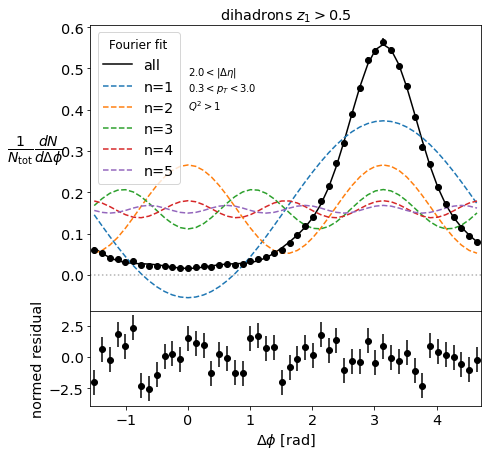

In [9]:
    
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons $z_1>0.5$")
plt.savefig("../images/fourier_dphi_all_dihadrons.pdf")
plt.show()

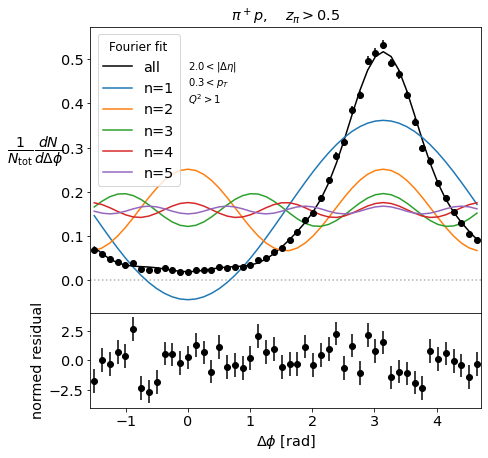

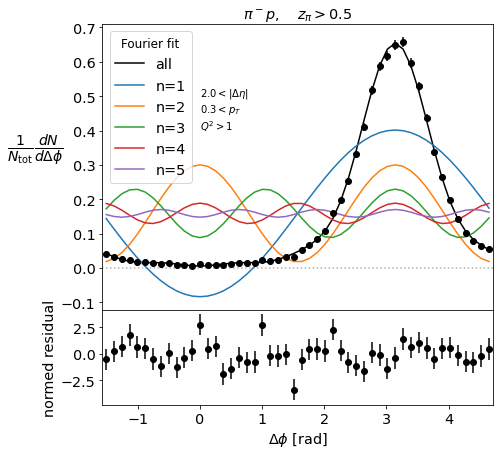

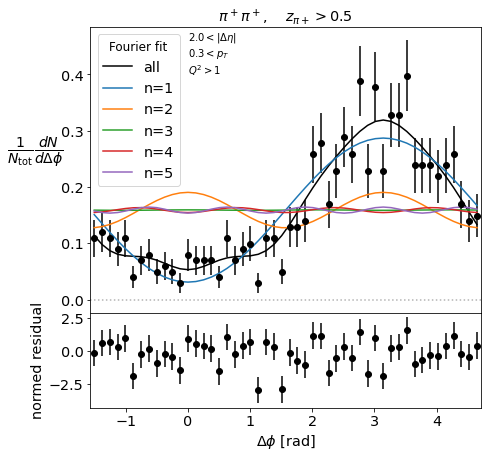

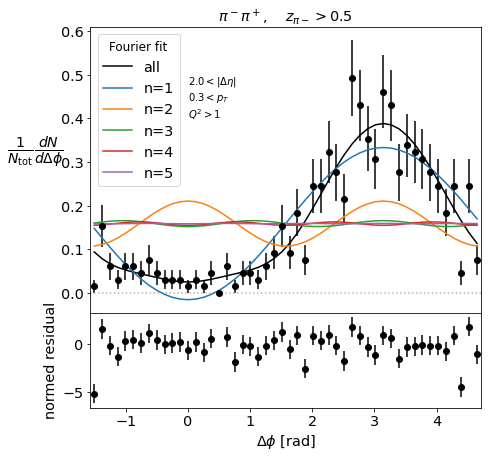

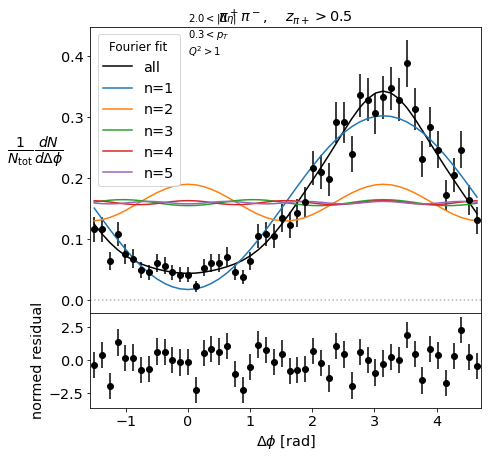

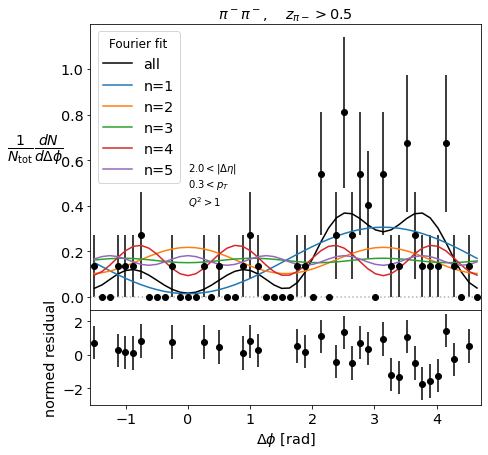

In [23]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==211")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^+ p$,    $z_\\pi>0.5$")
plt.savefig("../images/fourier_dphi_pip_p.pdf")
plt.show()

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==-211")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^- p$,    $z_\\pi>0.5$")
plt.savefig("../images/fourier_dphi_pim_p.pdf")
plt.show()

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 211 and h1_pid ==211")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^+\\pi^+$,    $z_{\\pi+}>0.5$")
plt.savefig("../images/fourier_dphi_pip_pip.pdf")
plt.show()

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 211 and h1_pid ==-211")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^- \\pi^+$,    $z_{\\pi-}>0.5$")
plt.savefig("../images/fourier_dphi_pim_pip.pdf")
plt.show()

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == -211 and h1_pid ==211")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^+\\pi^-$,    $z_{\\pi+}>0.5$")
plt.savefig("../images/fourier_dphi_pip_pim.pdf")
plt.show()

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == -211 and h1_pid ==-211")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^- \\pi^-$,    $z_{\\pi-}>0.5$")
plt.savefig("../images/fourier_dphi_pim_pim.pdf")
plt.show()

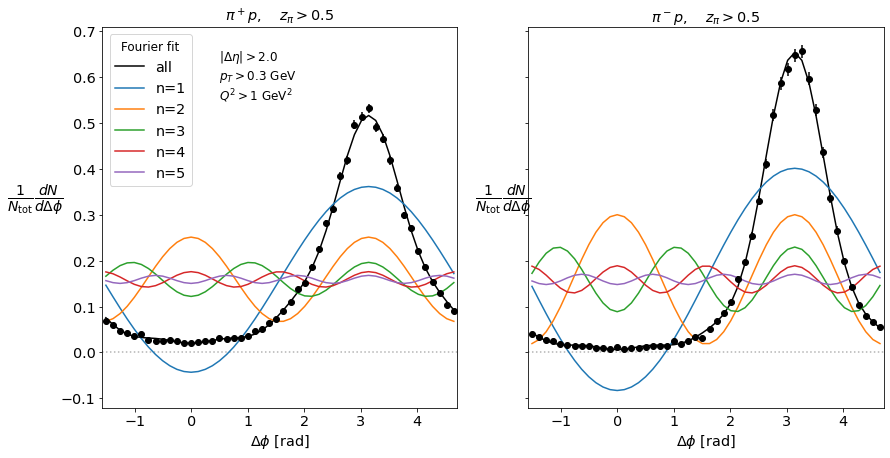

In [49]:
fig,axs = plt.subplots(1,2, figsize=(14,7),sharey='all')
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==211")
plt.sca(axs[0])
azimuthalPlot(df,n=5)
plt.text(0.5,0.55, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
plt.gca().set_title("$\\pi^+ p$,    $z_\\pi>0.5$")


df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==-211")
plt.sca(axs[1])
azimuthalPlot(df,n=5,includeLegend=False)
#plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^- p$,    $z_\\pi>0.5$")
plt.savefig("../images/fourier_dphi_pippim_p.pdf")
plt.show()

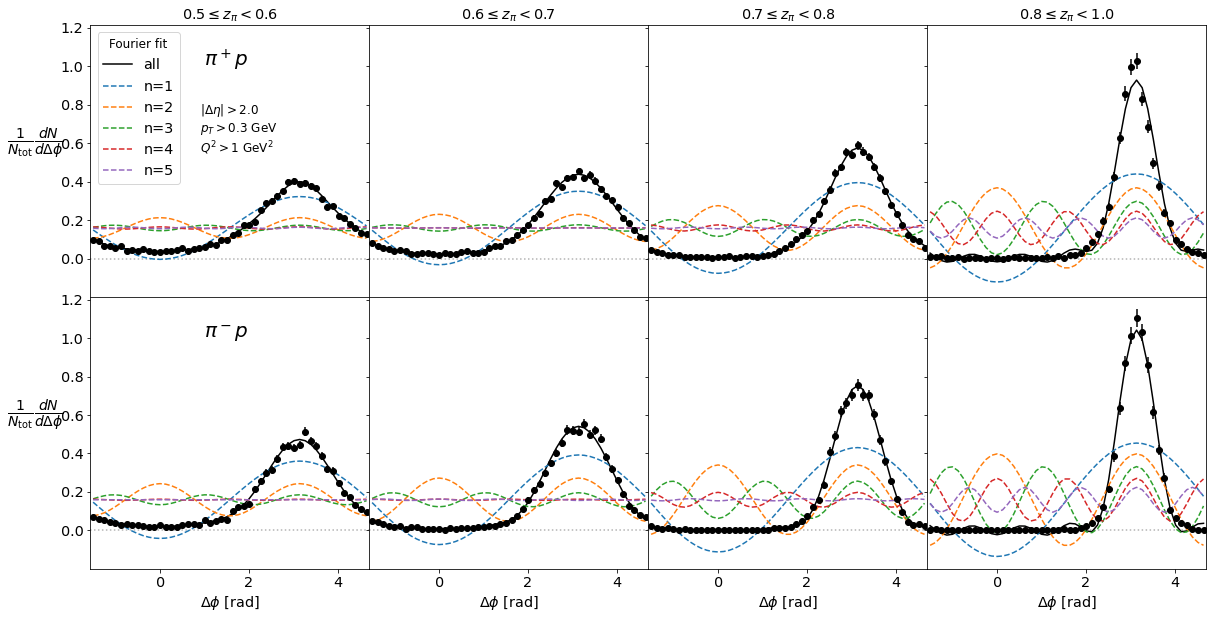

In [179]:

fig,axs = plt.subplots(2,4, figsize=(20,10),sharey='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(zmin,zmax) in enumerate([(0.5, 0.6),(0.6,0.7),(0.7,0.8),(0.8,1.0)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h1_z>=%s and h1_z<%s"% (pid,zmin,zmax))
        plt.sca(axs[i][j])
        azimuthalPlot(df,n=5,includeLegend=(i==0 and j==0))
        if i == 0 and j==0:
            plt.text(0.9,0.55, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
        if(j == 0):
            plt.text(1,1, "$\\pi^%sp$"%pm,fontsize=20)
        else:
            plt.gca().set_ylabel('')
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq z_\\pi<%.1f$"%(zmin,zmax))



plt.savefig("../images/fourier_dphi_pippim_p_vs_z.pdf",bbox_inches='tight')
plt.show()

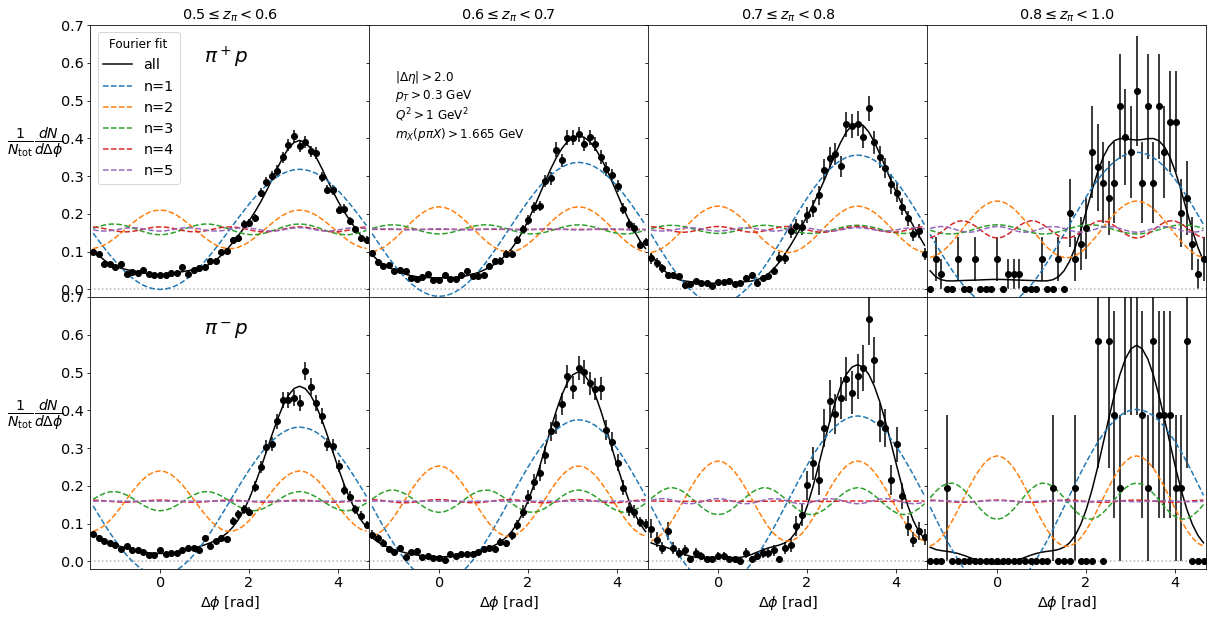

In [187]:

fig,axs = plt.subplots(2,4, figsize=(20,10),sharey='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(zmin,zmax) in enumerate([(0.5, 0.6),(0.6,0.7),(0.7,0.8),(0.8,1.0)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h1_z>=%s and h1_z<%s and h_X_mass>1.665"% (pid,zmin,zmax))
        plt.sca(axs[i][j])
        plt.gca().set_ylim(-.02,0.7)
        azimuthalPlot(df,n=5,includeLegend=(i==0 and j==0))
        if i == 0 and j==1:
            plt.text(-1,0.4, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$m_X(p\\pi X) > 1.665$ GeV",fontsize=12)
        if(j == 0):
            plt.text(1,0.6, "$\\pi^%sp$"%pm,fontsize=20)
        else:
            plt.gca().set_ylabel('')
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq z_\\pi<%.1f$"%(zmin,zmax))



plt.savefig("../images/fourier_dphi_pippim_p_vs_z_Delta_cut.pdf",bbox_inches='tight')
plt.show()

In [193]:
print(df.columns)

Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x', 'y', 'W',
       'h1_chi2pid', 'h2_chi2pid', 'h1_pid', 'h2_pid', 'h1_p', 'h2_p', 'h1_th',
       'h2_th', 'h1_ph', 'h2_ph', 'h1_z', 'h2_z', 'h1_eta', 'h2_eta',
       'h1_cm_p', 'h2_cm_p', 'h1_cm_th', 'h2_cm_th', 'h1_cm_ph', 'h2_cm_ph',
       'h1_cm_eta', 'h2_cm_eta', 'h1_cm_pt', 'h2_cm_pt', 'pair_mass',
       'diff_eta', 'diff_phi', 'nelectrons', 'diff_phi_cm', 'diff_eta_cm',
       'diff_phi_shift', 'missing_mass', 'pi_X_mass', 'h_X_mass'],
      dtype='object')


15562
7922
7264
3580
1845
842


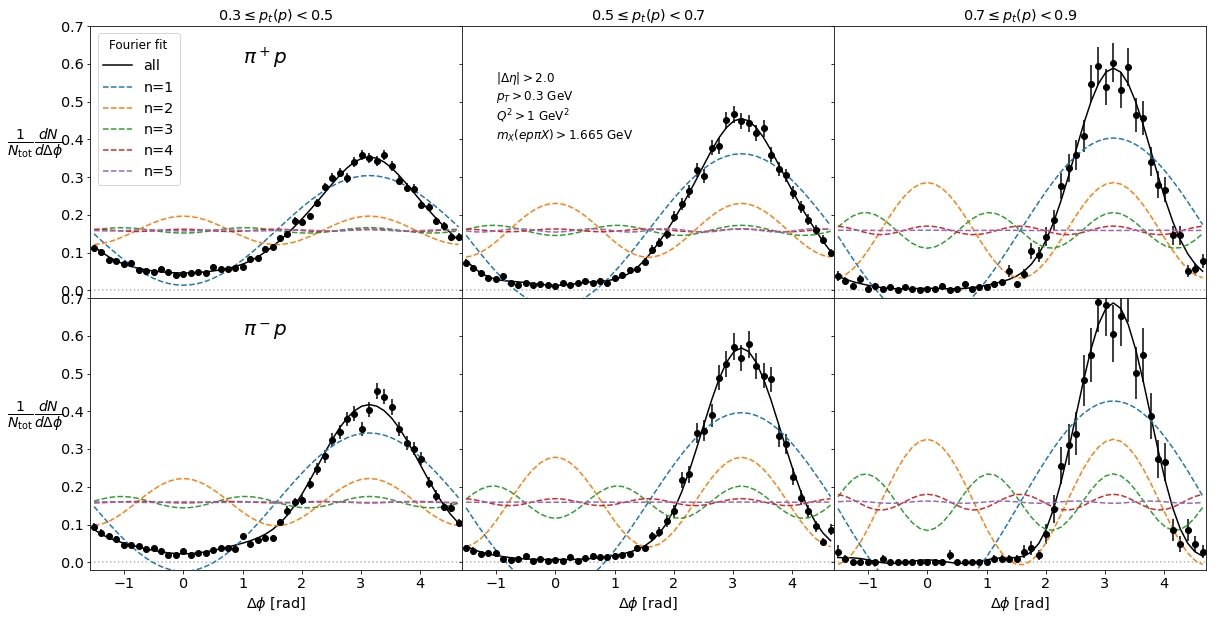

In [192]:

fig,axs = plt.subplots(2,3, figsize=(20,10),sharey='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(ptmin,ptmax) in enumerate([(0.3, 0.5),(0.5,0.7),(0.7,0.9)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h2_cm_pt>=%s and h2_cm_pt<%s and h_X_mass>1.665"% (pid,ptmin,ptmax))
        print(len(df))
        plt.sca(axs[i][j])
        plt.gca().set_ylim(-.02,0.7)
        azimuthalPlot(df,n=5,includeLegend=(i==0 and j==0))
        if i == 0 and j==1:
            plt.text(-1,0.4, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$m_X(ep\\pi X) > 1.665$ GeV",fontsize=12)
        if(j == 0):
            plt.text(1,0.6, "$\\pi^%sp$"%pm,fontsize=20)
        else:
            plt.gca().set_ylabel('')
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq p_t(p)<%.1f$"%(ptmin,ptmax))



plt.savefig("../images/fourier_dphi_pippim_p_vs_pt2p_Delta_cut.pdf",bbox_inches='tight')
plt.show()

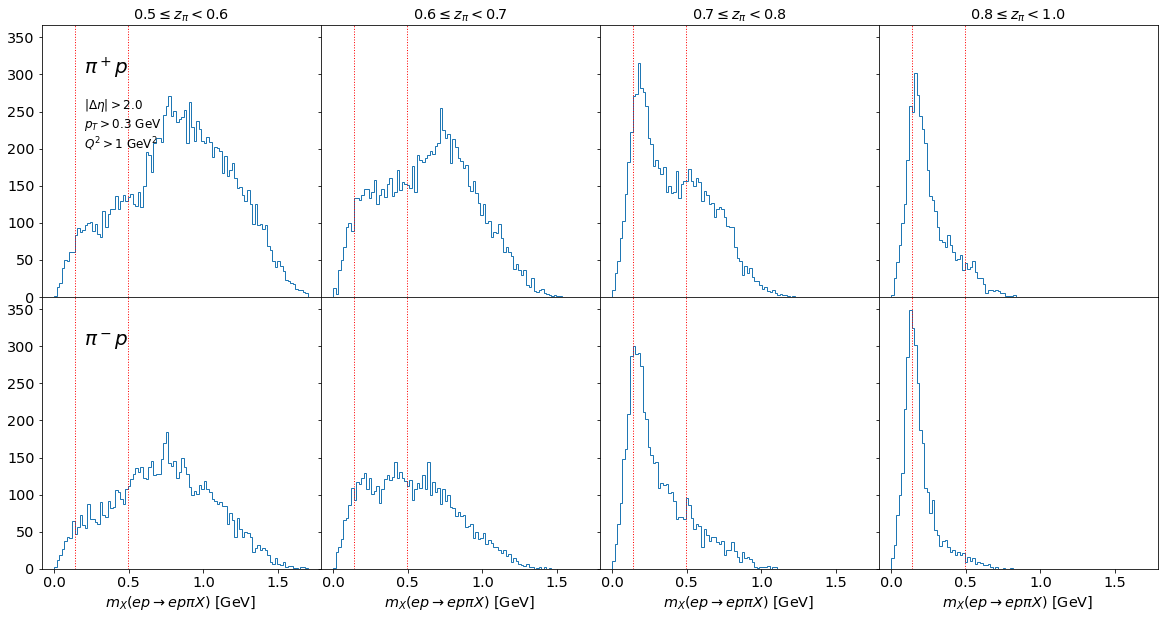

In [7]:
fig,axs = plt.subplots(2,4, figsize=(20,10),sharey='all',sharex='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(zmin,zmax) in enumerate([(0.5, 0.6),(0.6,0.7),(0.7,0.8),(0.8,1.0)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h1_z>=%s and h1_z<%s"% (pid,zmin,zmax))
        plt.sca(axs[i][j])
        plt.hist(df.mx_eh1h2x, histtype='step',bins=100,range=(0,1.7))
        
        if i == 0 and j==0:
            plt.text(0.2,200, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
        if(j == 0):
            plt.text(0.2,300, "$\\pi^%sp$"%pm,fontsize=20)
        else:
            plt.gca().set_ylabel('')
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq z_\\pi<%.1f$"%(zmin,zmax))
        #pion and kaon masses
        plt.axvline(.13957018,color='r',linewidth=1,linestyle=':')
        plt.axvline(.493677,color='r',linewidth=1,linestyle=':')
        #plt.hist(df.pair_mass, histtype='step',bins=100,range=(0,1.7))
    axs[-1][j].set_xlabel("$m_{X}(ep\\rightarrow ep\\pi X)$ [GeV]")



plt.savefig("../images/missing_mass_pi_p_vs_z.pdf",bbox_inches='tight')
plt.show()

In [8]:
def massive_plot(binvar, bins,title_format):
    fig,axs = plt.subplots(5,len(bins), figsize=(20,20),sharey='all',sharex='all', gridspec_kw={'hspace': 0.15, 'wspace':0})


    for i,(expr,label) in enumerate(zip(['W','pair_mass','mx_eh1h2x','mx_eh2x','mx_eh1x'],
                                      ["$W$ [GeV]","$m_{p\\pi}$ [GeV]",'$m_X(ep\\rightarrow ep\\pi X)$ [GeV]', "$m_X(ep\\rightarrow epX)$ [GeV]","$m_X(ep\\rightarrow e\\pi X)$ [GeV]"])):
        for j,(zmin,zmax) in enumerate(bins):



            for pid,pm in (211,"+"),(-211,'-'):
                df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                         + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and (%s)>=%s and (%s)<%s"% (pid,binvar,zmin,binvar,zmax))
                plt.sca(axs[i][j])
                plt.hist(df.eval(expr), histtype='step',bins=100,range=(0,4.2),label='$\\pi^%s p$'%pm)

        #         if i == 0 and j==0:
        #             plt.text(0.2,200, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
        #         if(j == 0):
        #             plt.text(0.2,300, "$\\pi^%sp$"%pm,fontsize=20)
            if i == 0:
                plt.gca().set_title(title_format%(zmin,zmax))
            elif i == 2:
                #pion, K, K* mass
                plt.axvline(.13957018,color='r',linewidth=1,linestyle=':',ymax=0.8)
                plt.text(0.03,0.85,'$m_\\pi$', transform=plt.gca().transAxes,color='r',fontsize=15)
                plt.axvline(.493667,color='r',linewidth=1,linestyle=':',ymax=0.8)
                plt.text(0.17,0.85,'$m_K$', transform=plt.gca().transAxes,color='r',fontsize=15)
                plt.axvline(0.89166,color='r',linewidth=1,linestyle=':',ymax=0.8)
                plt.text(0.3,0.85,'$m_{K*}$', transform=plt.gca().transAxes,color='r',fontsize=15)
            elif i == 3:
                #rho mass
                plt.axvline(.7754,color='r',linewidth=1,linestyle=':',ymax=0.8)
                plt.text(0.15,0.8,'$m_\\rho$', transform=plt.gca().transAxes,color='r',fontsize=15)
            elif i == 4:
                #Delta mass
                plt.axvline(1.232,color='r',linewidth=1,linestyle=':',ymax=0.8)
                plt.text(0.27,0.8,'$m_\\Delta$', transform=plt.gca().transAxes,color='r',fontsize=15)
                #plt.hist(df.pair_mass, histtype='step',bins=100,range=(0,1.7))
            axs[i][j].set_xlabel(label)
    axs[0][0].legend()

    axs[0][0].text(0.1,0.6, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12, transform=axs[0][0].transAxes)

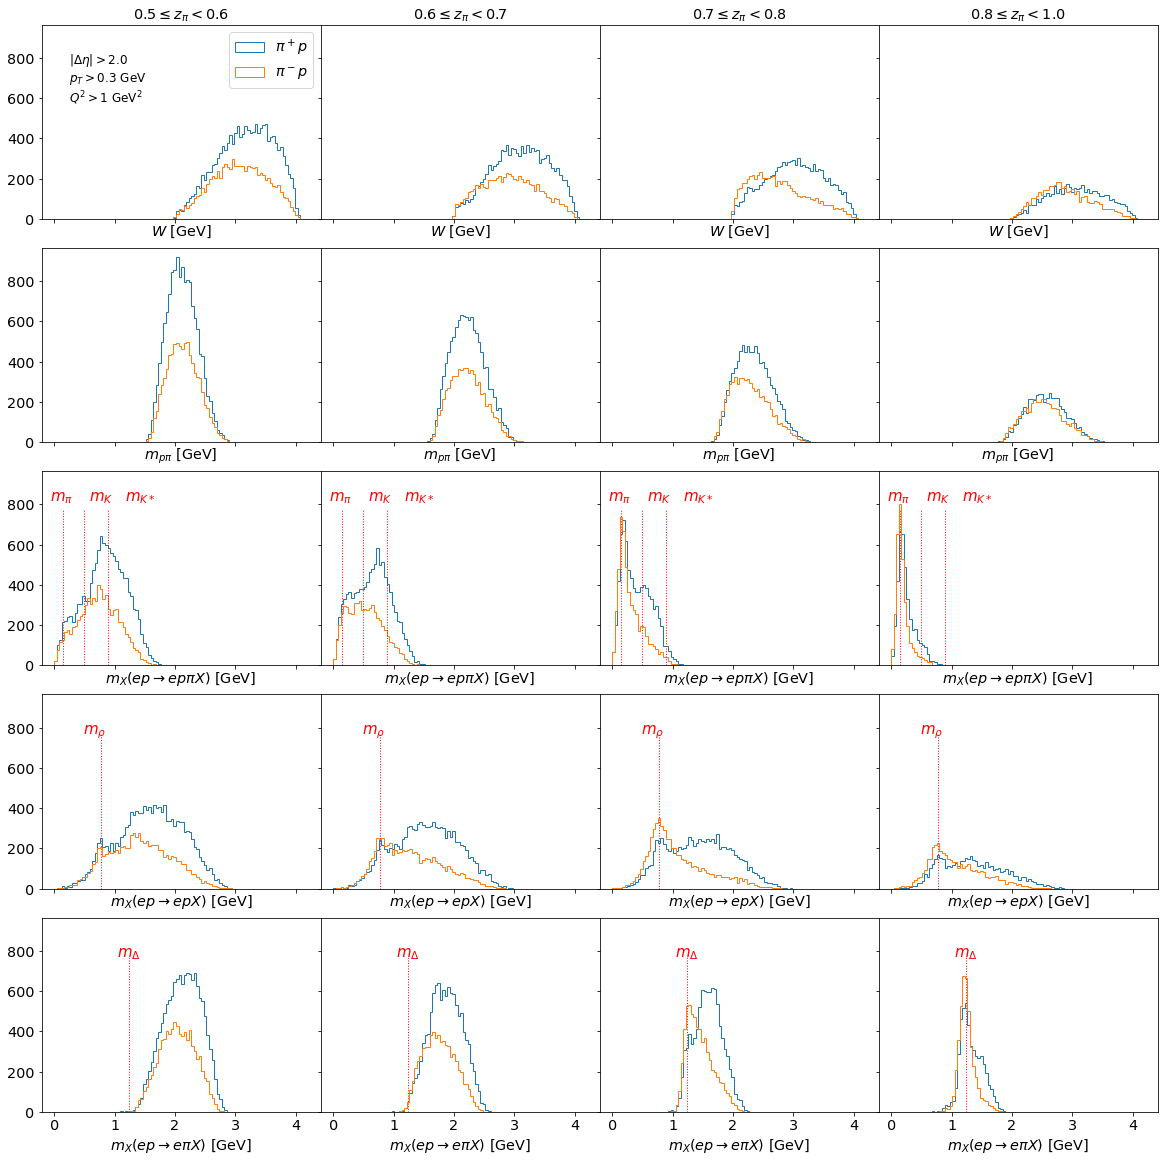

In [9]:
massive_plot(binvar='h1_z', bins=[(0.5, 0.6),(0.6,0.7),(0.7,0.8),(0.8,1.0)],title_format="$%.1f\\leq z_\\pi<%.1f$")
plt.savefig("../images/masses_pi_p_vs_z.pdf",bbox_inches='tight')
plt.show()

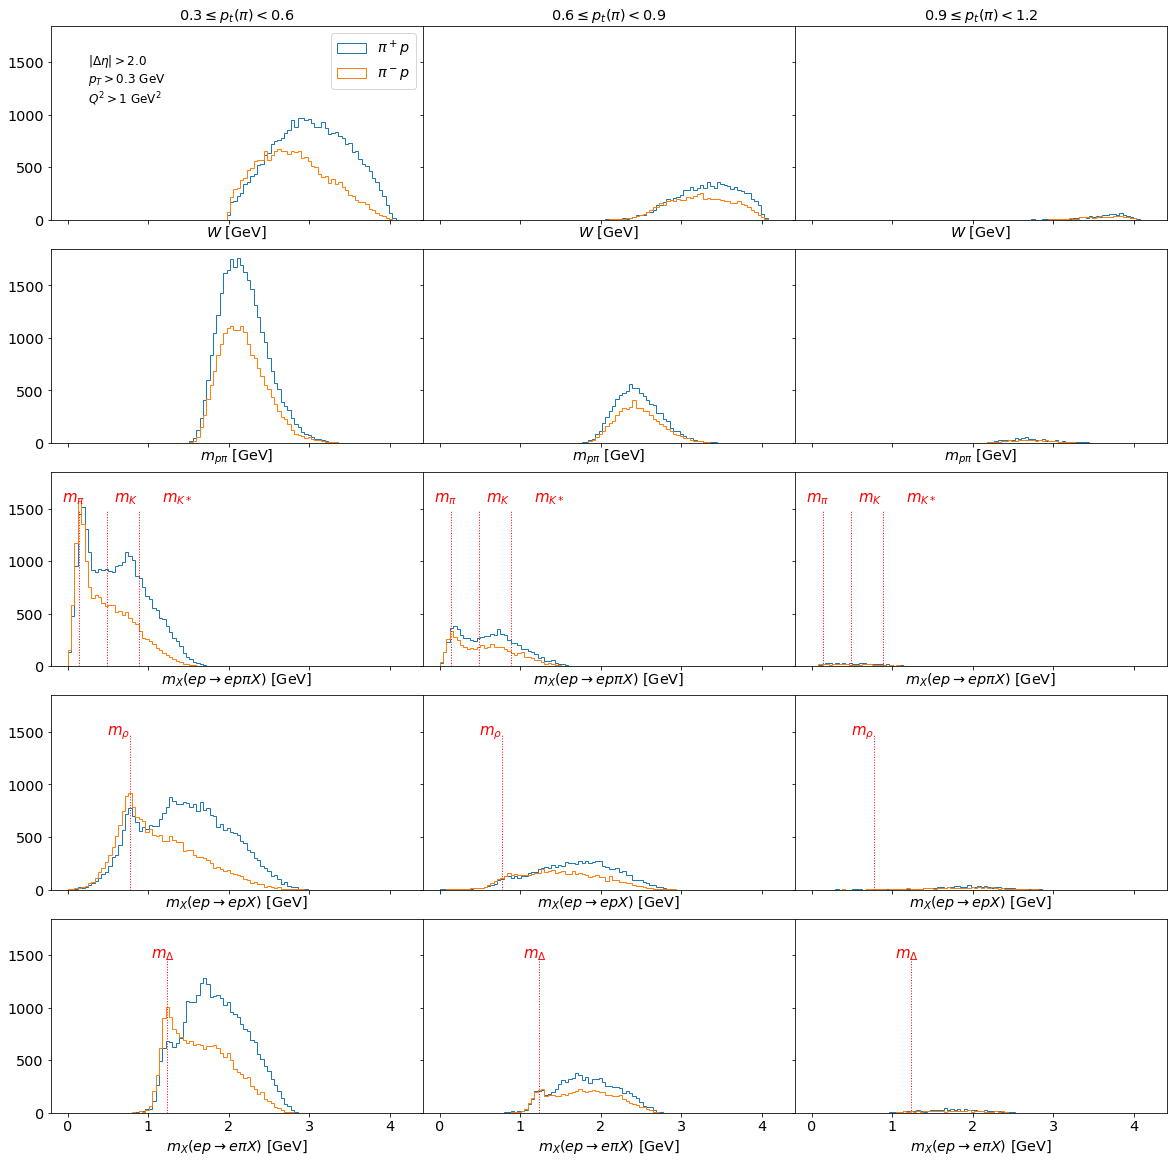

In [172]:
massive_plot(binvar='h1_cm_pt', bins=[(0.3, 0.6),(0.6,0.9),(0.9,1.2)],title_format="$%.1f\\leq p_t(\\pi)<%.1f$")
plt.savefig("../images/masses_pi_p_vs_z.pdf",bbox_inches='tight')
plt.show()

1.664994235013713


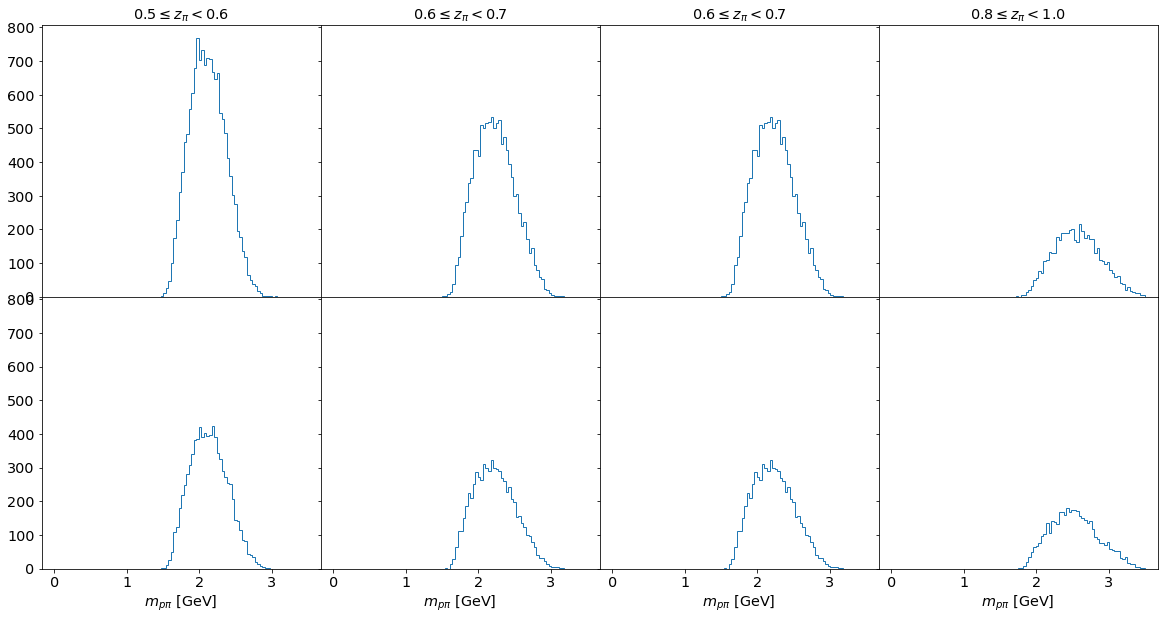

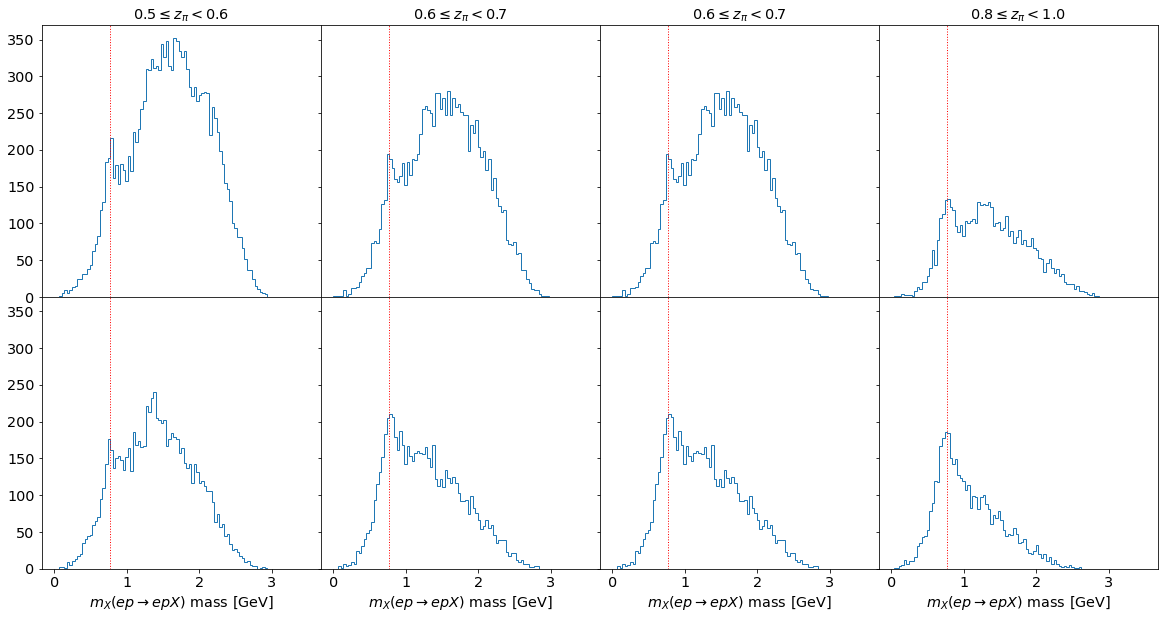

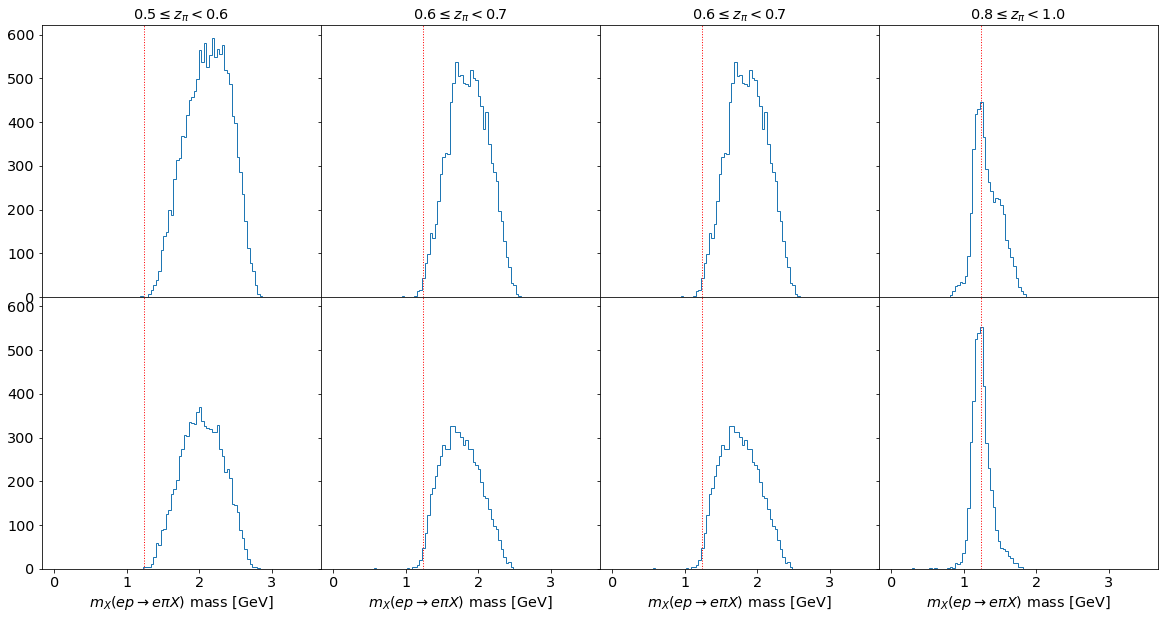

In [136]:
fig,axs = plt.subplots(2,4, figsize=(20,10),sharey='all',sharex='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(zmin,zmax) in enumerate([(0.5, 0.6),(0.6,0.7),(0.6,0.7),(0.8,1.0)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h1_z>=%s and h1_z<%s"% (pid,zmin,zmax))
        plt.sca(axs[i][j])
        plt.hist(df.pair_mass, histtype='step',bins=100,range=(0,3.5))
        
#         if i == 0 and j==0:
#             plt.text(0.2,200, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
#         if(j == 0):
#             plt.text(0.2,300, "$\\pi^%sp$"%pm,fontsize=20)
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq z_\\pi<%.1f$"%(zmin,zmax))
        #plt.hist(df.pair_mass, histtype='step',bins=100,range=(0,1.7))
    axs[-1][j].set_xlabel("$m_{p\\pi}$ [GeV]")



plt.savefig("../images/pair_mass_pi_p_vs_z.pdf",bbox_inches='tight')
plt.show()

fig,axs = plt.subplots(2,4, figsize=(20,10),sharey='all',sharex='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(zmin,zmax) in enumerate([(0.5, 0.6),(0.6,0.7),(0.6,0.7),(0.8,1.0)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h1_z>=%s and h1_z<%s"% (pid,zmin,zmax))
        plt.sca(axs[i][j])
        plt.hist(df.pi_X_mass, histtype='step',bins=100,range=(0,3.5))
        
#         if i == 0 and j==0:
#             plt.text(0.2,200, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
#         if(j == 0):
#             plt.text(0.2,300, "$\\pi^%sp$"%pm,fontsize=20)
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq z_\\pi<%.1f$"%(zmin,zmax))
        #plt.hist(df.pair_mass, histtype='step',bins=100,range=(0,1.7))
        
        plt.axvline(.7754,color='r',linewidth=1,linestyle=':')
    axs[-1][j].set_xlabel("$m_X(ep\\rightarrow epX)$ mass [GeV]")



plt.savefig("../images/piX_mass_pi_p_vs_z.pdf",bbox_inches='tight')
plt.show()

fig,axs = plt.subplots(2,4, figsize=(20,10),sharey='all',sharex='all', gridspec_kw={'hspace': 0, 'wspace':0})
for j,(zmin,zmax) in enumerate([(0.5, 0.6),(0.6,0.7),(0.6,0.7),(0.8,1.0)]):
    for i,pid,pm in (0,211,"+"),(1,-211,'-'):
        df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                                 + " and h1_cm_pt<3 and h2_pid == 2212 and h1_pid ==%s and h1_z>=%s and h1_z<%s"% (pid,zmin,zmax))
        plt.sca(axs[i][j])
        plt.hist(df.h_X_mass, histtype='step',bins=100,range=(0,3.5))
        
#         if i == 0 and j==0:
#             plt.text(0.2,200, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
#         if(j == 0):
#             plt.text(0.2,300, "$\\pi^%sp$"%pm,fontsize=20)
        if(i == 0):
            plt.gca().set_title("$%.1f\\leq z_\\pi<%.1f$"%(zmin,zmax))
        #plt.hist(df.pair_mass, histtype='step',bins=100,range=(0,1.7))
        
        
        #delta baryon
        plt.axvline(1.232,color='r',linewidth=1,linestyle=':')
    axs[-1][j].set_xlabel("$m_X(ep\\rightarrow e\\pi X)$ mass [GeV]")



plt.savefig("../images/hX_mass_pi_p_vs_z.pdf",bbox_inches='tight')
plt.show()

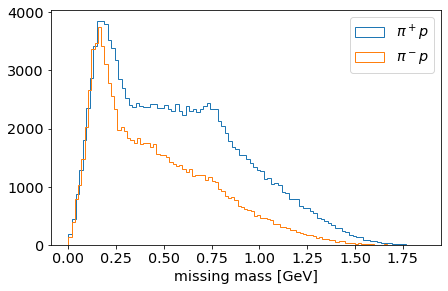

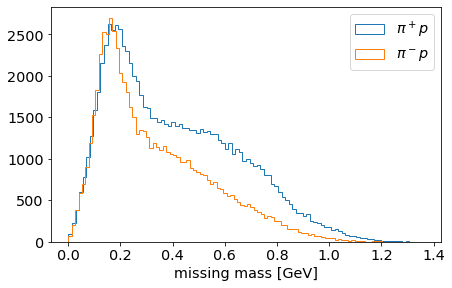

In [71]:
plt.hist(data_dihadrons.query("h2_pid==2212 and h1_pid==211").missing_mass,bins=100,histtype='step',label='$\\pi^+p$')
plt.hist(data_dihadrons.query("h2_pid==2212 and h1_pid==-211").missing_mass,bins=100,histtype='step',label='$\\pi^-p$')
plt.gca().set_xlabel("missing mass [GeV]")
plt.legend()
plt.savefig("../images/missingmass_pi_p.pdf",bbox_inches='tight')
plt.show()
plt.hist(data_dihadrons.query("h2_pid==2212 and h1_pid==211 and h1_z+h2_z-.938/E>0.8").missing_mass,bins=100,histtype='step',label='$\\pi^+p$')
plt.hist(data_dihadrons.query("h2_pid==2212 and h1_pid==-211 and h1_z+h2_z-.938/E>0.8").missing_mass,bins=100,histtype='step',label='$\\pi^-p$')
plt.gca().set_xlabel("missing mass [GeV]")
plt.legend()
plt.savefig("../images/missingmass_pi_p_highz.pdf",bbox_inches='tight')

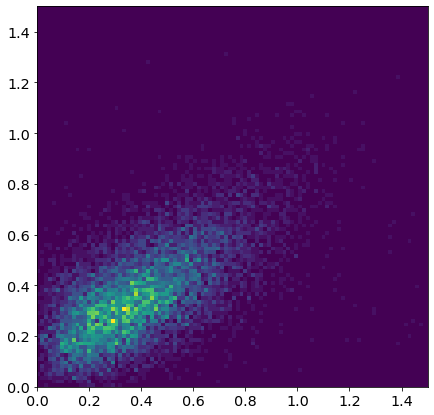

In [80]:
fig,axs = plt.subplots(1,1,figsize=(7,7))
df = data_dihadrons.query("h2_pid==2212 and h1_pid==211 and h1_z>0.8")
plt.hist2d(df.h1_cm_pt,df.h2_cm_pt,range=((0,1.5),(0,1.5)),bins=(100,100))
plt.show()

In [ ]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h2_pid == 2212")
azimuthalPlot(df,includeResiduals=True,n=5)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T$\n$Q^2>1$")
plt.gca().set_title("$\\pi^\\pm p$,    $z_\\pi>0.5$")
plt.savefig("../images/fourier_dphi_pi_p.pdf")
plt.show()

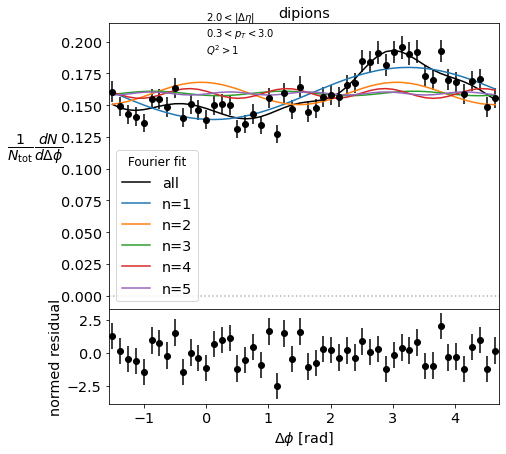

In [195]:
df = data_dipions.query(("abs(h1_cm_eta-h2_cm_eta)>2.0 and abs(h1_cm_eta-h2_cm_eta)<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3").replace("h","pi"))
azimuthalPlot(df,n=5,includeResiduals=True)
plt.text(0,0.19, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dipions")
plt.savefig("../images/fourier_dphi_dipions.pdf")
plt.show()

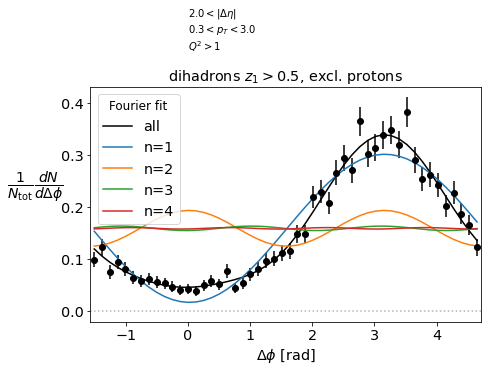

In [196]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid != 2212")
azimuthalPlot(df)
plt.text(0,0.5, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons $z_1>0.5$, excl. protons")
plt.savefig("../images/fourier_dphi_dihadrons_exclude_protons.pdf")
plt.show()

In [34]:
def VnPlot(iterator,var='v2',n=2,phibins = 50,color='k',xoffset=0,label=None):
    
    bs = []
    dbs = []
    xx = []
    for xmid,df in iterator:
        x,y,dy = [],[],[]
        if(len(df) == 0):
            continue
        denom = len(df)*2*np.pi/phibins
        for xmid1, bindf in misc_util.BinIterator(df, "diff_phi_shift", -np.pi/2,np.pi*3/2,phibins):
            x.append(xmid1)
            y.append(len(bindf)/denom)
            dy.append(np.sqrt(len(bindf))/denom)
        x = pd.Series(x)
        y = pd.Series(y)
        dy = pd.Series(dy)
        #plt.errorbar(x,y,dy,marker='o',color='k',linestyle='')
        b = sum(y*np.cos(n*x))/len(x)
        db = np.sqrt(sum(dy**2*np.cos(n*x)**2))/len(x)
        
        b/= sum(y)/len(x)
        db/= sum(y)/len(x)
        bs.append(b)
        dbs.append(db)
        xx.append(xmid+xoffset)
    plt.errorbar(xx,bs,dbs, linestyle='', marker='o',color=color,label=label)

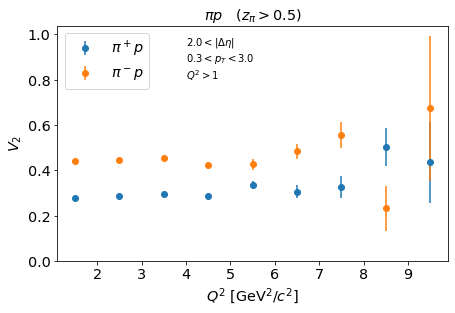

In [55]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid == 2212 and h1_pid==211")
VnPlot(misc_util.BinIterator(df, "Q2", 1,10,9),color=None,label='$\\pi^+p$')
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid == 2212 and h1_pid==-211")
VnPlot(misc_util.BinIterator(df, "Q2", 1,10,9),color=None,label='$\\pi^-p$')
plt.gca().set_ylim(0)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")
plt.text(4,0.8, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("$\pi p$   $(z_\\pi>0.5)$")
plt.legend(loc='upper left')
plt.savefig("../images/v2_vs_Q2_pi_p.pdf",bbox_inches='tight')
plt.show();

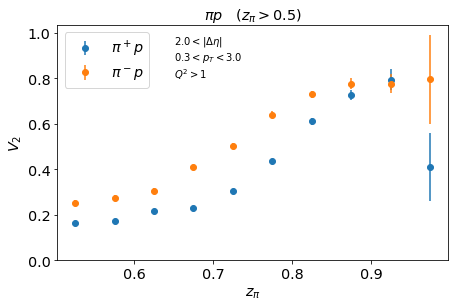

In [56]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid == 2212 and h1_pid==211")
VnPlot(misc_util.BinIterator(df, "h1_z", 0.5,1,10),color=None,label='$\\pi^+p$')
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid == 2212 and h1_pid==-211")
VnPlot(misc_util.BinIterator(df, "h1_z", 0.5,1,10),color=None,label='$\\pi^-p$')
plt.gca().set_ylim(0)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$z_\\pi$")
plt.text(0.65,0.8, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("$\pi p$   $(z_\\pi>0.5)$")
plt.legend(loc='upper left')
plt.savefig("../images/v2_vs_z_pi_p.pdf",bbox_inches='tight')
plt.show();

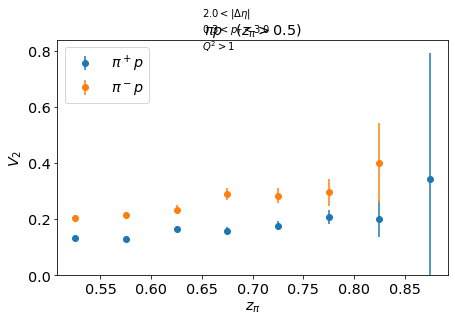

In [177]:
#now remove deltas and rhos
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid == 2212 and h1_pid==211 and h_X_mass>1.7 and pi_X_mass>1.0")
VnPlot(misc_util.BinIterator(df, "h1_z", 0.5,1,10),color=None,label='$\\pi^+p$')
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid == 2212 and h1_pid==-211 and h_X_mass>1.7 and pi_X_mass>1.0")
VnPlot(misc_util.BinIterator(df, "h1_z", 0.5,1,10),color=None,label='$\\pi^-p$')
plt.gca().set_ylim(0)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$z_\\pi$")
plt.text(0.65,0.8, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("$\pi p$   $(z_\\pi>0.5)$")
plt.legend(loc='upper left')
plt.savefig("../images/v2_vs_z_pi_p_avoid_delta_and_rho.pdf",bbox_inches='tight')
plt.show();

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]


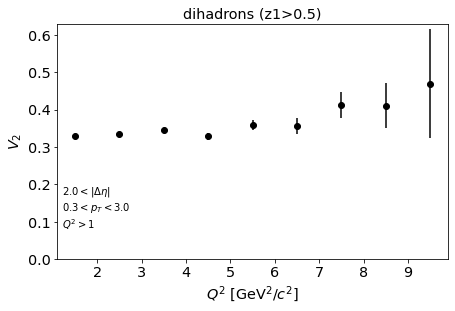

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]


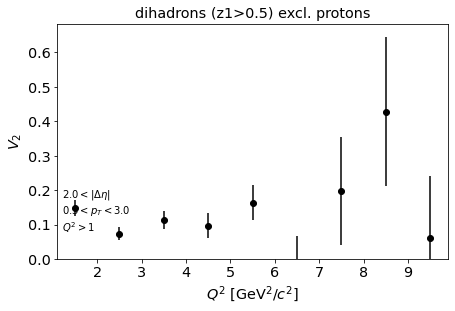

In [223]:
    
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")
print([x[0] for x in misc_util.BinIterator(df, "Q2", 1,10,9)])
VnPlot(misc_util.BinIterator(df, "Q2", 1,10,9))
plt.gca().set_ylim(0)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")
plt.text(1.2,0.08, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons (z1>0.5)")
plt.savefig("../images/v2_vs_Q2.pdf")
plt.show();

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid<2000")
print([x[0] for x in misc_util.BinIterator(df, "Q2", 1,10,9)])
VnPlot(misc_util.BinIterator(df, "Q2", 1,10,9))
plt.gca().set_ylim(0)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")
plt.text(1.2,0.08, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons (z1>0.5) excl. protons")
plt.savefig("../images/v2_vs_Q2_exclude_protons.pdf")

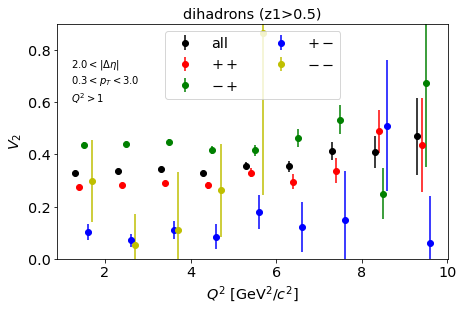

In [198]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")
for sub,color,xoffset,label in zip([df] +[df.query(q) for q in ("h1_pid == 211 and h2_pid>0;h1_pid == -211 and h2_pid>0;"+\
            "h1_pid == 211 and h2_pid<0;h1_pid == -211 and h2_pid<0").split(";")],'krgby', (-.2,-.1,0,.1,.2),
                                 'all $++$ $-+$ $+-$ $--$'.split()):
    VnPlot(misc_util.BinIterator(sub, "Q2", 1,10,9), color=color,xoffset=xoffset,label=label)
plt.gca().set_ylim(0,0.9)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")
plt.text(1.2,0.6, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons (z1>0.5)")
plt.legend(loc='upper center',ncol=2)
plt.savefig("../images/v2_vs_Q2_charge_combos.pdf")

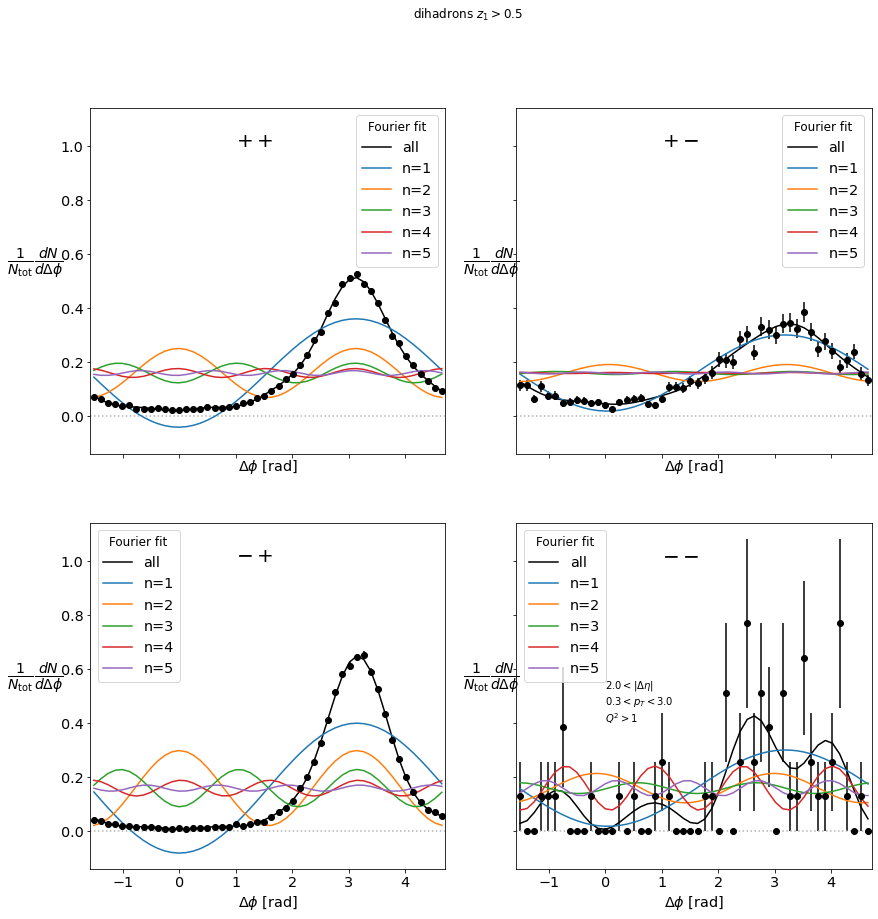

In [209]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")

fig,axs = plt.subplots(2,2, figsize=(14,14),sharex='all',sharey='all')
for i,(sub,color,xoffset,label) in enumerate(zip([df.query(q) for q in ("h1_pid == 211 and h2_pid>0;h1_pid == -211 and h2_pid>0;"+\
            "h1_pid == 211 and h2_pid<0;h1_pid == -211 and h2_pid<0").split(";")],'krgby', (-.2,-.1,0,.1,.2),
                                 '$++$ $-+$ $+-$ $--$'.split())):
    plt.sca(axs[i%2][i//2])
    azimuthalPlot(sub,n=5)
    plt.text(1,1, label, fontsize=20)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.suptitle("dihadrons $z_1>0.5$")
plt.savefig("../images/fourier_dphi_dihadrons_charge_combos.pdf")
plt.show()

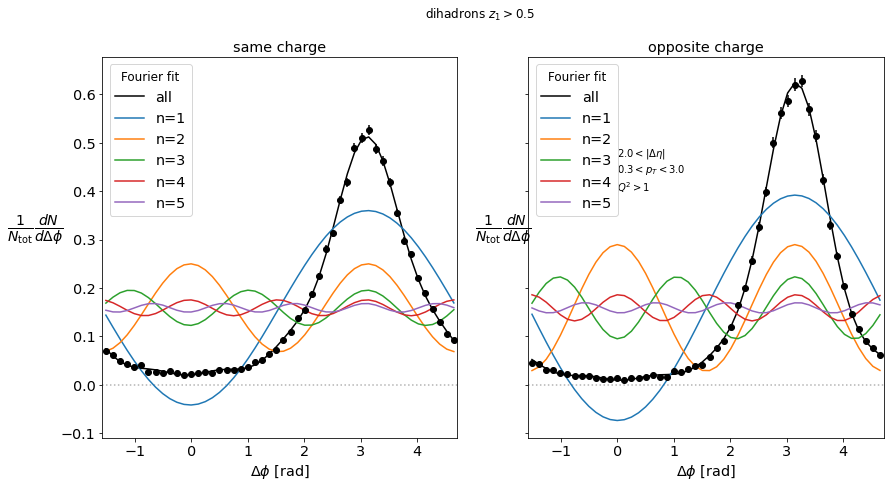

In [208]:

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")

fig,axs = plt.subplots(1,2, figsize=(14,7),sharex='all',sharey='all')
for i,(sub,color,xoffset,label) in enumerate(zip([df.query(q) for q in ("h1_pid*h2_pid>0;h1_pid*h2_pid<0").split(";")],\
                                                 'krgby', (-.1,.1),'same charge,opposite charge'.split(','))):
    plt.sca(axs[i%2])
    azimuthalPlot(sub,n=5)
    plt.gca().set_title(label)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.suptitle("dihadrons $z_1>0.5$")
plt.savefig("../images/fourier_dphi_dihadrons_charge_same_diff.pdf")
plt.show()


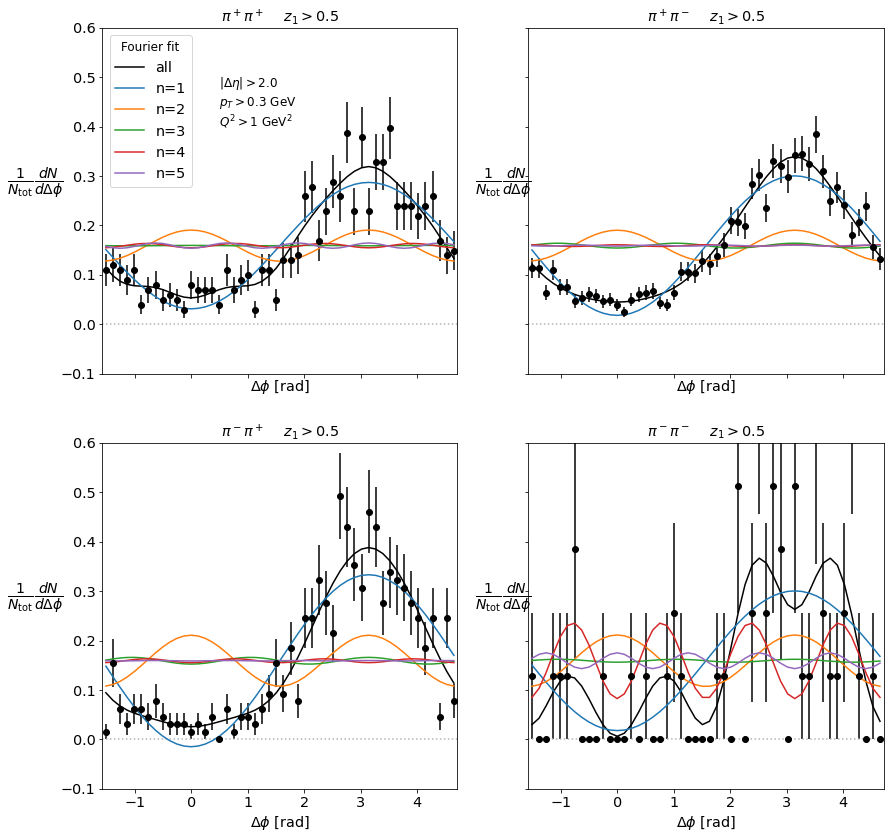

In [51]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid < 300")

fig,axs = plt.subplots(2,2, figsize=(14,14),sharex='all',sharey='all')
for i,(sub,color,xoffset,label) in enumerate(zip([df.query(q) for q in ("h1_pid == 211 and h2_pid>0;h1_pid == -211 and h2_pid>0;"+\
            "h1_pid == 211 and h2_pid<0;h1_pid == -211 and h2_pid<0").split(";")],'krgby', (-.2,-.1,0,.1,.2),
                                 '$\\pi^+\\pi^+$ $\\pi^-\\pi^+$ $\\pi^+\\pi^-$ $\\pi^-\\pi^-$'.split())):
    plt.sca(axs[i%2][i//2])
    azimuthalPlot(sub,n=5, includeLegend=(i==0))
    plt.gca().set_title(label +"    $z_1>0.5$")
    plt.gca().set_ylim(-.1,0.6)
axs[0][0].text(0.5,0.4, "$|\\Delta\\eta|>2.0$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$",fontsize=12)
plt.savefig("../images/fourier_dphi_dihadrons_charge_combos_pions_only.pdf",bbox_inches='tight')
plt.show()

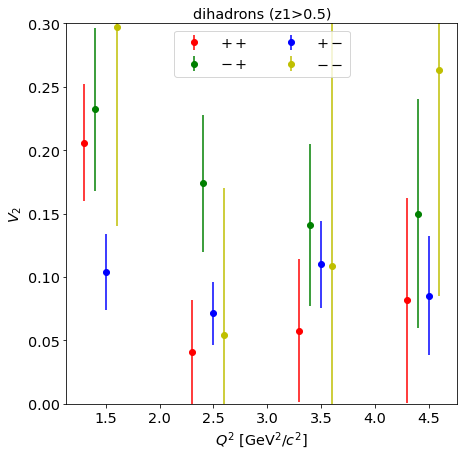

In [53]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3 and h2_pid < 300")

fig,ax = plt.subplots(1,1, figsize=(7,7))
for i,(sub,color,xoffset,label) in enumerate(zip([df.query(q) for q in ("h1_pid == 211 and h2_pid>0;h1_pid == -211 and h2_pid>0;"+\
            "h1_pid == 211 and h2_pid<0;h1_pid == -211 and h2_pid<0").split(";")],'rgby', (-.2,-.1,0,.1,.2),
                                 '$++$ $-+$ $+-$ $--$'.split())):
    VnPlot(misc_util.BinIterator(sub, "Q2", 1,5,4), color=color,xoffset=xoffset,label=label)
plt.gca().set_ylim(0,0.3)
plt.gca().set_ylabel("$V_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")
#plt.text(1.2,0.6, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons (z1>0.5)")
plt.legend(loc='upper center',ncol=2)
plt.savefig("../images/v2_vs_Q2_charge_combos_exclude_protons.pdf")
    

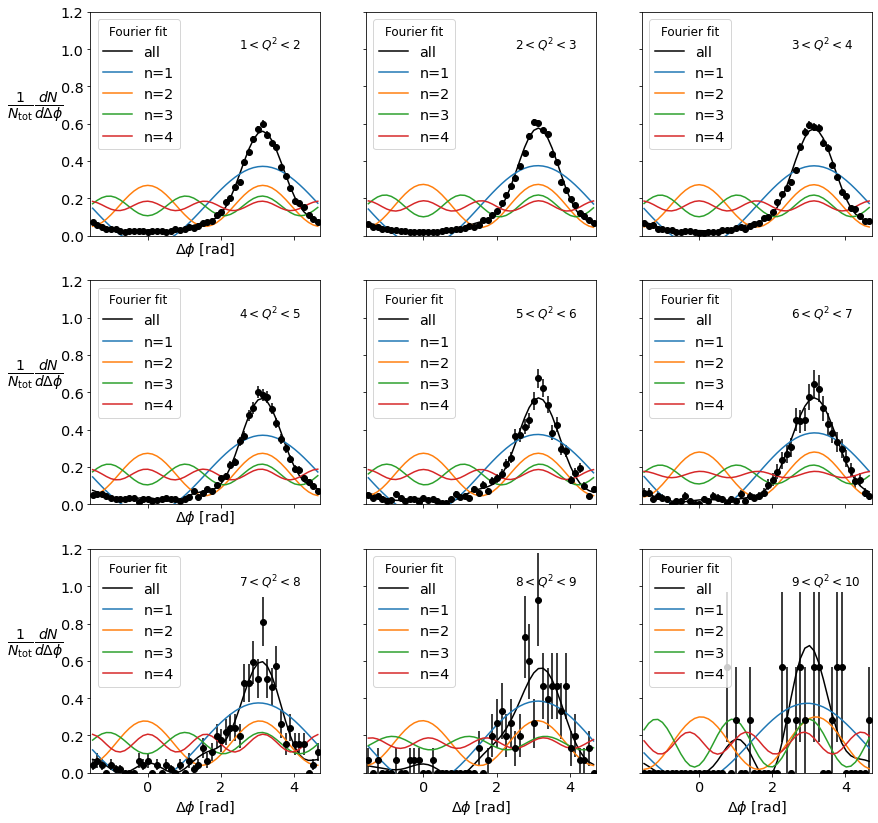

In [76]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>1.5 and h1_cm_eta-h2_cm_eta<2.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")
fig,axs = plt.subplots(3,3,figsize=(14,14),sharey='all',sharex='all')
for i,(x,bindf) in enumerate(misc_util.BinIterator(df, 'Q2', 1, 10,9)):
    plt.sca(axs[i//3][i%3])
    plt.gca().text(2.5,1.0,"$%s < Q^2 < %s$"% (i+1,i+2),fontsize=12)
    plt.gca().set_ylim(0, 1.2)
    azimuthalPlot(bindf)
    
axs[0][1].set_xlabel("")
axs[0][1].set_ylabel("")
axs[0][2].set_xlabel("")
axs[0][2].set_ylabel("")
axs[1][1].set_xlabel("")
axs[1][1].set_ylabel("")
axs[1][2].set_xlabel("")
axs[1][2].set_ylabel("")
axs[2][1].set_ylabel("")
axs[2][2].set_ylabel("")

plt.savefig("../images/fourier_dphi_Q2.pdf")

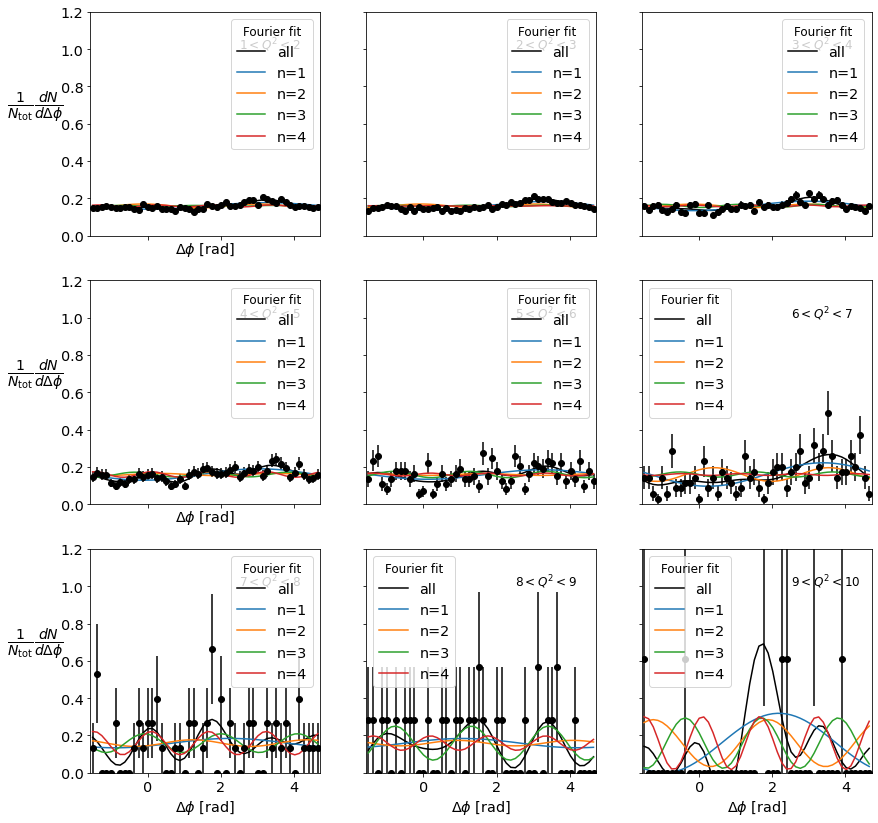

In [80]:
df = data_dipions.query("pi1_cm_eta-pi2_cm_eta>1.5 and pi1_cm_eta-pi2_cm_eta<2.0 and pi1_cm_pt>0.3 and pi2_cm_pt>0.3"\
                         + " and pi1_cm_pt<3 and pi1_cm_pt < 3")
fig,axs = plt.subplots(3,3,figsize=(14,14),sharey='all',sharex='all')
for i,(x,bindf) in enumerate(misc_util.BinIterator(df, 'Q2', 1, 10,9)):
    plt.sca(axs[i//3][i%3])
    plt.gca().text(2.5,1.0,"$%s < Q^2 < %s$"% (i+1,i+2),fontsize=12)
    plt.gca().set_ylim(0, 1.2)
    azimuthalPlot(bindf)
    
axs[0][1].set_xlabel("")
axs[0][1].set_ylabel("")
axs[0][2].set_xlabel("")
axs[0][2].set_ylabel("")
axs[1][1].set_xlabel("")
axs[1][1].set_ylabel("")
axs[1][2].set_xlabel("")
axs[1][2].set_ylabel("")
axs[2][1].set_ylabel("")
axs[2][2].set_ylabel("")

plt.savefig("../images/fourier_dphi_Q2_dipions.pdf")

In [ ]:
import misc_util

def azimuthalPlot(df,n=4,bins = 50):
    x,y,dy = [],[],[]
    
    denom = len(df)*2*np.pi/bins
    for xmid, bindf in misc_util.BinIterator(df, "diff_phi_shift", -np.pi/2,np.pi*3/2,bins):
        x.append(xmid)
        y.append(len(bindf)/denom)
        dy.append(np.sqrt(len(bindf))/denom)
    x = pd.Series(x)
    y = pd.Series(y)
    dy = pd.Series(dy)
    plt.errorbar(x,y,dy,marker='o',color='k',linestyle='')
    n = 4
    
    a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
    b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
    b[0]/=2
    s = 0
    for i in range(0,n+1):
        s = a[i]*np.sin(i*x)+b[i]*np.cos(i*x)+s
    plt.plot(x,s,linestyle='-',color='k',label='all')
    for i in range(1,n+1):
        plt.plot(x,a[i]*np.sin(i*x)+b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='-', label="n=%s"%i)
    plt.gca().set_xlim(-np.pi/2,np.pi*3/2)
    plt.gca().set_ylabel("$\\frac{1}{N_{\\mathrm{tot}}}\\frac{dN}{d\\Delta\\phi}$",rotation=0,fontsize=20,labelpad=25)
    plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
    legend = plt.gca().legend(title="Fourier fit")
    plt.setp(legend.get_title(),fontsize=12)
    
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and h1_cm_pt<3 and h1_cm_pt < 3")
azimuthalPlot(df)
plt.text(0,0.4, "$2.0<|\\Delta\\eta|$\n$0.3<p_T<3.0$\n$Q^2>1$")
plt.gca().set_title("dihadrons $z_1>0.5$")
plt.savefig("../images/fourier_dphi_dihadrons_.pdf")
plt.show()

# brazil plots

In [17]:
import scipy.optimize
def yridge(df,n=3,bins = 50,debugplots = False):
    x,y,dy=[],[],[]
    denom = len(df)*2*np.pi/bins
    for xmid, bindf in misc_util.BinIterator(df, "abs(diff_phi)", 0,np.pi,bins):
        x.append(xmid)
        y.append(len(bindf)/denom)
        dyi = np.sqrt(len(bindf))/denom
        dyi=dyi
        if xmid<0.1 or xmid>2:
            dyi = 1000;
        dy.append(dyi)
    x = pd.Series(x)
    y = pd.Series(y)
    dy = pd.Series(dy)
    def f (xx,b0,b1,b2,b3):
        args=[b0,b1,b2,b3]
        tot = 0
        for i in range(len(args)):
            tot+=args[i]*np.cos(i*xx)
        return tot
    b,bcov = scipy.optimize.curve_fit(f, x, y,sigma=dy)
    #b = [2*sum(y*np.cos(i*x)/dy**2)/sum(1/dy**2) for i in range(0,n+1)]
    #b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
    #b[0]/=2
   
    s = 0
    for i in range(0,n+1):
        s = b[i]*np.cos(i*x)+s
    if(debugplots):
        print(b)
        plt.errorbar(x,y,dy,linestyle='',marker='o',color='k')
        plt.plot(x,s,linestyle='-')
        plt.gca().set_ylim(-1,1)
    
    smin = s[0]
    xmin=0
    for xi,si in zip(x,s):
        if(si<smin):
            xmin = xi
            smin = si
    integral = 0
    dx = x[1]-x[0]
    for xi,si in zip(x,s):
        if(xi<xmin):
            integral+=(si-smin)*dx
        else:
            break
    return integral
    

In [18]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")

print(yridge(df, ))



0


In [40]:
import scipy.optimize,numpy.random
def upper_limit_yridge(df,n=3,bins = 100,miniterations=100,maxiterations=100000,fitrange=(0,np.pi)):
    start = time.perf_counter()
    x,y,dy,w=[],[],[],[]
    denom = len(df)*2*np.pi/bins
    for xmid, bindf in misc_util.BinIterator(df, "abs(diff_phi)", 0,np.pi,bins):
        x.append(xmid)
        y.append(len(bindf)/denom)
        dyi = np.sqrt(len(bindf))/denom
        dy.append(dyi)
        w.append(1/dyi**2 if not(xmid<fitrange[0] or xmid>fitrange[1]) else 1000);
    x = pd.Series(x)
    y = pd.Series(y)
    dy = pd.Series(dy)
    w = pd.Series(w)
    yields=[]
    nonzeroyields=0
    for ii in range(maxiterations):
        yrand = y+numpy.random.randn(1)*dy*(dy<999)
        if n==3:
            def f (xx,b0,b1,b2,b3):
                args=[b0,b1,b2,b3]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        
        if n==4:
            def f (xx,b0,b1,b2,b3,b4):
                args=[b0,b1,b2,b3,b4]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        if n==5:
            def f (xx,b0,b1,b2,b3,b4,b5):
                args=[b0,b1,b2,b3,b4,b5]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        b,bcov = scipy.optimize.curve_fit(f, x, yrand,sigma=1/np.sqrt(w))
        
        #don't waste your time if f''[0] is positive
        if sum([-i*i*b[i] for i in range(len(b))]) < 0:  
            s = 0
            for i in range(0,n+1):
                s = b[i]*np.cos(i*x)+s

            smin = max(s)

            xmin=fitrange[0]
            for xi,si in zip(x,s):
                if(xi<fitrange[0]):
                    continue
                if(si<smin):
                    xmin = xi
                    smin = si
            integral = 0
            dx = x[1]-x[0]
            for xi,si in zip(x,s):
                if(xi<xmin):
                    integral+=(si-smin)*dx
                else:
                    break
            yields.append(integral)
            nonzeroyields+=1
        else :
            yields.append(0)
        durationsofar = time.perf_counter()-start;
        if ii%100 == 0:
            print("iter ", ii, "; average so far: ", durationsofar/(ii+1), 
              ";   time so far: ",durationsofar//3600,"hours", (durationsofar//60)%60, "minutes", int(durationsofar % 60), "seconds")
        if ii == 100 and nonzeroyields == 0:
            break
            
    duration = time.perf_counter()-start;
    print("total time: ",duration//3600,"hours", (duration//60)%60, "minutes", duration % 60, "seconds")
    os.system('say "done"')    
    yields = pd.Series(yields)
    
    UL = yields.quantile(.95)
    CL = .95
    
    thresh = 1e-5
    if UL <thresh:
        UL = thresh
        CL = len(yields[yields<thresh])/len(yields)
    return UL, CL
    
    

In [41]:

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")
print(upper_limit_yridge(df,miniterations=100,n=3,bins=50,fitrange=(0,np.pi)))


iter  0 ; average so far:  0.1944591439987562 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.030091318752461616 ;   time so far:  0.0 hours 0.0 minutes 3 seconds
total time:  0.0 hours 0.0 minutes 3.0394009629999346 seconds
(1e-05, 1.0)


iter  0 ; average so far:  0.19260205300088273 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.02977161078218493 ;   time so far:  0.0 hours 0.0 minutes 3 seconds
total time:  0.0 hours 0.0 minutes 3.0071182289993885 seconds
1e-05 1.0
iter  0 ; average so far:  0.19320023099862738 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.029543197435631025 ;   time so far:  0.0 hours 0.0 minutes 2 seconds
total time:  0.0 hours 0.0 minutes 2.984059893999074 seconds
1e-05 1.0
iter  0 ; average so far:  0.20283761300015613 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.03047468105940803 ;   time so far:  0.0 hours 0.0 minutes 3 seconds
total time:  0.0 hours 0.0 minutes 3.0782129079998413 seconds
1e-05 1.0
iter  0 ; average so far:  0.19427649400131486 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.029683899871304334 ;   time so far:  0.0 hours 0.0 minutes 2 seconds

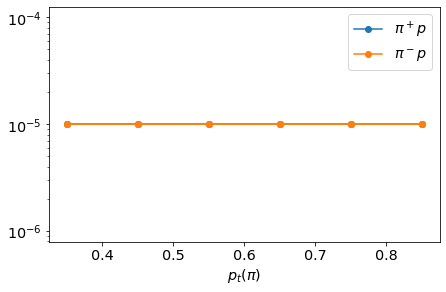

In [49]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")
x,y=[],[]
for pid,pm in (211,"+"),(-211,'-'):
    df_pid = df.query("h1_pid == %s" %pid)
    for xmid,bindf in misc_util.BinIterator(df_pid,"h1_cm_pt", 0.3, 0.9,6):
        UL,CL = upper_limit_yridge(df,miniterations=100,n=3,bins=50,fitrange=(0,np.pi))
        print(UL,CL)
        x.append(xmid)
        y.append(UL)
    plt.plot(x,y,marker='o',label='$\\pi^%sp$'%pm)
plt.gca().set_yscale('log')
plt.gca().set_xlabel("$p_t(\\pi)$")
plt.gca().legend()
plt.show()

iter  0 ; average so far:  0.19324393900024006 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.0305332566534675 ;   time so far:  0.0 hours 0.0 minutes 3 seconds
total time:  0.0 hours 0.0 minutes 3.084146764000252 seconds
1e-05 1.0
iter  0 ; average so far:  0.2108831490004377 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.030249842712863136 ;   time so far:  0.0 hours 0.0 minutes 3 seconds
total time:  0.0 hours 0.0 minutes 3.055399421000402 seconds
1e-05 1.0
iter  0 ; average so far:  0.19318382299934456 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.029474734594061535 ;   time so far:  0.0 hours 0.0 minutes 2 seconds
total time:  0.0 hours 0.0 minutes 2.977110862999325 seconds
1e-05 1.0
iter  0 ; average so far:  0.19429259699973045 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.02983199037623875 ;   time so far:  0.0 hours 0.0 minutes 3 seconds
tot

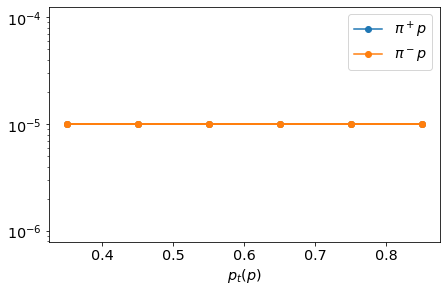

In [50]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")
x,y=[],[]
for pid,pm in (211,"+"),(-211,'-'):
    df_pid = df.query("h1_pid == %s" %pid)
    for xmid,bindf in misc_util.BinIterator(df_pid,"h2_cm_pt", 0.3, 0.9,6):
        UL,CL = upper_limit_yridge(df,miniterations=100,n=3,bins=50,fitrange=(0,np.pi))
        print(UL,CL)
        x.append(xmid)
        y.append(UL)
    plt.plot(x,y,marker='o',label='$\\pi^%sp$'%pm)
plt.gca().set_yscale('log')
plt.gca().set_xlabel("$p_t(p)$")
plt.gca().legend()
plt.show()

In [ ]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")
x,y=[],[]
for xmid,bindf in misc_util.BinIterator(df,"h1_cm_pt", 0.3, .12,8):
    UL,CL = upper_limit_yridge(df,miniterations=100,n=3,bins=50,fitrange=(0,np.pi))
    print(UL,CL)
    x.append(xmid)
    y.append(UL)
plt.plot(x,y,marker='o')
plt.gca().set_yscale('log')
plt.show()

In [341]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and h_X_mass>1.665")
print(upper_limit_yridge(df,iterations=100,n=3,bins=500,fitrange=(0.1,2)))

0    -0.000033
1    -0.000037
2    -0.000028
3    -0.000037
4    -0.000034
        ...   
95   -0.000043
96   -0.000037
97   -0.000034
98   -0.000037
99   -0.000029
Length: 100, dtype: float64


In [335]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and h_X_mass>1.665 and h1_pid == 211")
print(upper_limit_yridge(df,iterations=100,n=3,bins=100,fitrange=(0.1,2)))

0.0
